# Final Project - Phase 1
# Name: Kedamawi Mengistu
# Id: 216339269

# TASK 1: GATHERING REVIEWS

In [1]:
pip install google-play-scraper

In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install reviews

In [3]:
import csv
import pandas as pd
from google_play_scraper import Sort, reviews

In [4]:
def get_reviews_from_gp(package_name):
    # Columns of the CSV file
    columns = ['Package Name', 'Reviewer Name', 'Review', 'Rating']

    # 5000, english, and american reviews
    reviews_list, continuation_token = reviews(
        package_name,
        lang='en',
        country='us',
        sort=Sort.NEWEST,
        count=5000
    )

    # CSV file with pacakage name is being created
    csv_filename = f'{package_name}.csv'
    with open(csv_filename, mode='w', encoding='utf-8', newline='') as f:
        writer = csv.DictWriter(f, fieldnames=columns)
        writer.writeheader()
        for review in reviews_list:
            reviewer_name = review['userName']
            review_content = review['content']
            review_rating = review['score']
            row_dict = {'Package Name': package_name,
                        'Reviewer Name': reviewer_name,
                        'Review': review_content,
                        'Rating': review_rating}
            writer.writerow(row_dict)

    # Return the name of the CSV file
    return csv_filename

In [5]:
# App 1 reviews is obtained and saved to csv file referenced by csv_1_app1 
csv_1_app1 = get_reviews_from_gp('de.markusfisch.android.screentime')
app1_df = pd.read_csv(csv_1_app1)
num_reviews1 = len(app1_df)

In [6]:
# App 2 reviews is obtained and saved to csv file referenced by csv_2_app2
csv_2_app2 = get_reviews_from_gp('com.actiondash.playstore')
app2_df = pd.read_csv(csv_2_app2)
num_reviews2 = len(app2_df)

In [7]:
# App 3 reviews is obtained and saved to csv file referenced by csv_3_app3
csv_3_app3 = get_reviews_from_gp('master.app.screentime')
app3_df = pd.read_csv(csv_3_app3)
num_reviews3 = len(app3_df)

In [8]:
# App 4 reviews is obtained and saved to csv file referenced by csv_4_app4
csv_4_app4 = get_reviews_from_gp('com.peakpocketstudios.quantum')
app4_df = pd.read_csv(csv_4_app4)
num_reviews4 = len(app4_df)

In [9]:
# App 1 reviews is obtained and saved to csv file referenced by csv_5_app5
csv_5_app5 = get_reviews_from_gp('com.appusage.monitor')
app5_df = pd.read_csv(csv_5_app5)
num_reviews5 = len(app5_df) 

In [10]:
# Printing out extra relavent information for each app (size of reviews)
print(f'Retrieved {num_reviews1} reviews for Screen Time')
print(f'Retrieved {num_reviews2} reviews for ActionDash: Screen Time Helper')
print(f'Retrieved {num_reviews3} reviews for Screen Time - Restrain yoursel')
print(f'Retrieved {num_reviews4} reviews for Quantum: App Screen Time Stats')
print(f'Retrieved {num_reviews5} reviews for Screen Time, Digital Wellbeing')

Retrieved 42 reviews for Screen Time
Retrieved 5000 reviews for ActionDash: Screen Time Helper
Retrieved 5000 reviews for Screen Time - Restrain yoursel
Retrieved 18 reviews for Quantum: App Screen Time Stats
Retrieved 189 reviews for Screen Time, Digital Wellbeing


# TASK 2: PREPROCESS YOUR TEXT

In [11]:
pip install --upgrade nltk

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install num2words

Note: you may need to restart the kernel to use updated packages.


In [13]:
import string
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from num2words import num2words

In [14]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kedag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kedag\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\kedag\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [15]:
def make_revs_pre(pre_df):
    # Copy the Review column of df
    pre_df["Reviews_that_are_Pre_pro"] = pre_df["Review"]
    
    # 1st part of preprocess occurs here
    def preprocess_review(review):
        # Handle NaN values (edge case)
        if type(review) != str:
            return ""
        # Remove punctuation
        review = re.sub(r'[^\w\s]', '', review)
        # Remove special characters
        review = re.sub(r'[^\x00-\x7F]+', '', review)
        # Remove emojis
        review = re.sub(r'[^\w\s,]', '', review)
        # Convert to lowercase
        review = review.lower()
        # Convert numbers to word equivalents
        review = ' '.join([num2words(int(word)) if word.isnumeric() else word for word in review.split()])
        # Remove extra whitespace
        review = re.sub(r'\s+', ' ', review.strip())
        # Remove stopwords
        review = ' '.join([word for word in word_tokenize(review) if word not in stop_words])
        return review
    
    # Apply on entire coloumn
    pre_df["Reviews_that_are_Pre_pro"] = pre_df["Reviews_that_are_Pre_pro"].apply(preprocess_review)
    
    return pre_df

In [16]:
# Aids in assigning POS TAGS to words
def pos_tags_assigner(treebank_tag):
        if treebank_tag.startswith('J'):
            return wordnet.ADJ
        elif treebank_tag.startswith('V'):
            return wordnet.VERB
        elif treebank_tag.startswith('N'):
            return wordnet.NOUN
        elif treebank_tag.startswith('R'):
            return wordnet.ADV
        else:
            return wordnet.NOUN

In [17]:
def lemmatize_revs(pre_df):
    if pre_df is None or pre_df.empty:
        return pre_df
    
    lemmatizer = WordNetLemmatizer()

    # Tokenize and tag parts of speech
    pre_df["Final Preprocessed Reviews"] = pre_df["Reviews_that_are_Pre_pro"].apply(lambda x: [lemmatizer.lemmatize(word, pos=pos_tags_assigner(tag)) for (word, tag) in nltk.pos_tag(nltk.word_tokenize(x))])

    # Join the lemmatized words
    pre_df["Final Preprocessed Reviews"] = pre_df["Final Preprocessed Reviews"].apply(lambda x: ' '.join(x))

    # Drop columns
    pre_df = pre_df.drop(columns=["Reviews_that_are_Pre_pro"])

    return pre_df

In [18]:
app1_df = make_revs_pre(app1_df)
app1_df = lemmatize_revs(app1_df)
app1a_df = pd.DataFrame(app1_df['Final Preprocessed Reviews'].copy())
app1_df = app1_df.drop(columns=['Final Preprocessed Reviews'])
app1a_df.head(15)

,Final Preprocessed Reviews
0,app suck cant trick parent
1,app best well include app time consume still a...
2,
3,one thing need add last day history track prev...
4,say tin install app open app show screentime n...
5,lack feature like graph istead pie chart dont ...
6,havent even try yet theres ad app purchase lik...
7,
8,nice app add option date wise data
9,pretty simple easy use plugandplay app ive use...


In [19]:
app2_df = make_revs_pre(app2_df)
app2_df = lemmatize_revs(app2_df)
app2a_df = pd.DataFrame(app2_df['Final Preprocessed Reviews'].copy())
app2_df = app2_df.drop(columns=['Final Preprocessed Reviews'])
app2a_df.head(15)

,Final Preprocessed Reviews
0,didnt like idea app full access screen 2nd req...
1,idk try want didnt help report daily screen ti...
2,work intend overloaded ad good statistic nothi...
3,mm
4,amaze app
5,love app app always want glad find quickly lov...
6,perfect
7,get bad time doesnt block limit apps way
8,
9,good aplicacin


In [20]:
app3_df = make_revs_pre(app3_df)
app3_df = lemmatize_revs(app3_df)
app3a_df = pd.DataFrame(app3_df['Final Preprocessed Reviews'].copy())
app3_df = app3_df.drop(columns=['Final Preprocessed Reviews'])
app3a_df.head(15)

,Final Preprocessed Reviews
0,loove dis dat
1,useful
2,please make dark notification fit dark theme a...
3,amaze appevery thing cleareasy useful
4,good
5,excellent simple
6,tv
7,great app say wish feature big close app butto...
8,think app best system
9,app work really well easy use design chows eve...


In [21]:
app4_df = make_revs_pre(app4_df)
app4_df = lemmatize_revs(app4_df)
app4a_df = pd.DataFrame(app4_df['Final Preprocessed Reviews'].copy())
app4_df = app4_df.drop(columns=['Final Preprocessed Reviews'])
app4a_df.head(15)

,Final Preprocessed Reviews
0,work
1,gusta mucho la aplicacin el diseo visual e muy...
2,beautifully design simple straightforward scre...
3,attractive barebones
4,would like notification bar app kind big job e...
5,meh
6,nice
7,excellent thanks
8,best alternative app digital wellbeing applica...
9,would awesome whitelist apps manage category p...


In [22]:
app5_df = make_revs_pre(app5_df)
app5_df = lemmatize_revs(app5_df)
app5a_df = pd.DataFrame(app5_df['Final Preprocessed Reviews'].copy())
app5_df = app5_df.drop(columns=['Final Preprocessed Reviews'])
app5a_df.head(15)

,Final Preprocessed Reviews
0,screen
1,nice
2,good app
3,best
4,good app
5,jxufu
6,hjj
7,nice app
8,best
9,good app


# TASK 3: SENTIMENT ANALYSIS

In [23]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [24]:
from textblob import TextBlob

In [25]:
def table_text_blob_retriever(app_df_in):
    # Get 250 reviews
    place_holder_df = app_df_in.head(250).copy()

    # Calculate polarity
    place_holder_df["Polarity"] = place_holder_df["Final Preprocessed Reviews"].apply(lambda x: TextBlob(x).sentiment.polarity)

    # Output table
    df_to_return = pd.DataFrame()
    df_to_return["App’s package name"] = place_holder_df.apply(lambda x: "", axis=1)
    df_to_return["Review"] = place_holder_df["Final Preprocessed Reviews"]
    df_to_return["Polarity"] = place_holder_df["Polarity"]
    return df_to_return

In [26]:
app1tb_df = table_text_blob_retriever(app1a_df)
app1tb_df["App’s package name"] = 'de.markusfisch.android.screentime'
app1tb_df.head(250)

,App’s package name,Review,Polarity
0,de.markusfisch.android.screentime,app suck cant trick parent,0.000000
1,de.markusfisch.android.screentime,app best well include app time consume still a...,1.000000
2,de.markusfisch.android.screentime,,0.000000
3,de.markusfisch.android.screentime,one thing need add last day history track prev...,-0.083333
4,de.markusfisch.android.screentime,say tin install app open app show screentime n...,0.205556
5,de.markusfisch.android.screentime,lack feature like graph istead pie chart dont ...,-0.037500
6,de.markusfisch.android.screentime,havent even try yet theres ad app purchase lik...,0.000000
7,de.markusfisch.android.screentime,,0.000000
8,de.markusfisch.android.screentime,nice app add option date wise data,0.650000
9,de.markusfisch.android.screentime,pretty simple easy use plugandplay app ive use...,0.140476


In [27]:
app2tb_df = table_text_blob_retriever(app2a_df)
app2tb_df["App’s package name"] = 'com.actiondash.playstore'
app2tb_df.head(250)

,App’s package name,Review,Polarity
0,com.actiondash.playstore,didnt like idea app full access screen 2nd req...,0.070000
1,com.actiondash.playstore,idk try want didnt help report daily screen ti...,0.000000
2,com.actiondash.playstore,work intend overloaded ad good statistic nothi...,0.700000
3,com.actiondash.playstore,mm,0.000000
4,com.actiondash.playstore,amaze app,0.000000
...,...,...,...
245,com.actiondash.playstore,good,0.700000
246,com.actiondash.playstore,pta nhi,0.000000
247,com.actiondash.playstore,great app doesnt pick phone call reliably abd ...,0.542857
248,com.actiondash.playstore,,0.000000


In [28]:
app3tb_df = table_text_blob_retriever(app3a_df)
app3tb_df["App’s package name"] = 'master.app.screentime'
app3tb_df.head(250)

,App’s package name,Review,Polarity
0,master.app.screentime,loove dis dat,0.000000
1,master.app.screentime,useful,0.300000
2,master.app.screentime,please make dark notification fit dark theme a...,0.033333
3,master.app.screentime,amaze appevery thing cleareasy useful,0.300000
4,master.app.screentime,good,0.700000
...,...,...,...
245,master.app.screentime,say use several day cut screen time fifty use ...,0.000000
246,master.app.screentime,restrain get premium go premium mention price ...,0.034722
247,master.app.screentime,great app,0.800000
248,master.app.screentime,work well,0.000000


In [29]:
app4tb_df = table_text_blob_retriever(app4a_df)
app4tb_df["App’s package name"] = 'com.peakpocketstudios.quantum'
app4tb_df.head(250)

,App’s package name,Review,Polarity
0,com.peakpocketstudios.quantum,work,0.000000
1,com.peakpocketstudios.quantum,gusta mucho la aplicacin el diseo visual e muy...,0.000000
2,com.peakpocketstudios.quantum,beautifully design simple straightforward scre...,0.431250
3,com.peakpocketstudios.quantum,attractive barebones,0.800000
4,com.peakpocketstudios.quantum,would like notification bar app kind big job e...,0.140000
5,com.peakpocketstudios.quantum,meh,0.000000
6,com.peakpocketstudios.quantum,nice,0.600000
7,com.peakpocketstudios.quantum,excellent thanks,0.600000
8,com.peakpocketstudios.quantum,best alternative app digital wellbeing applica...,0.500000
9,com.peakpocketstudios.quantum,would awesome whitelist apps manage category p...,1.000000


In [30]:
app5tb_df = table_text_blob_retriever(app5a_df)
app5tb_df["App’s package name"] = 'com.appusage.monitor'
app5tb_df.head(250)

,App’s package name,Review,Polarity
0,com.appusage.monitor,screen,0.000
1,com.appusage.monitor,nice,0.600
2,com.appusage.monitor,good app,0.700
3,com.appusage.monitor,best,1.000
4,com.appusage.monitor,good app,0.700
...,...,...,...
184,com.appusage.monitor,hxxud,0.000
185,com.appusage.monitor,good appp,0.700
186,com.appusage.monitor,nice app,0.600
187,com.appusage.monitor,nice app,0.600


In [31]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [32]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [33]:
def table_vader_retriever(app_df_in):
    # Limit the DataFrame to the first 250 rows
    place_holder_df = app_df_in.head(250).copy()
    
    # Create a Vader sentiment analyzer
    analyzer = SentimentIntensityAnalyzer()
    
    # Get the sentiment polarity for each review
    place_holder_df["Polarity"] = place_holder_df["Final Preprocessed Reviews"].apply(lambda x: analyzer.polarity_scores(x)["compound"])

    # Create the output table
    df_to_return = pd.DataFrame()
    df_to_return["App’s package name"] = place_holder_df.apply(lambda x: "", axis=1)
    df_to_return["Review"] = place_holder_df["Final Preprocessed Reviews"]
    df_to_return["Polarity"] = place_holder_df["Polarity"]
    
    return df_to_return

In [34]:
app1_vad_df = table_vader_retriever(app1a_df)
app1_vad_df["App’s package name"] = 'de.markusfisch.android.screentime'
app1_vad_df.head(250)

,App’s package name,Review,Polarity
0,de.markusfisch.android.screentime,app suck cant trick parent,-0.4122
1,de.markusfisch.android.screentime,app best well include app time consume still a...,0.8885
2,de.markusfisch.android.screentime,,0.0000
3,de.markusfisch.android.screentime,one thing need add last day history track prev...,0.0000
4,de.markusfisch.android.screentime,say tin install app open app show screentime n...,0.9041
5,de.markusfisch.android.screentime,lack feature like graph istead pie chart dont ...,-0.4404
6,de.markusfisch.android.screentime,havent even try yet theres ad app purchase lik...,0.6124
7,de.markusfisch.android.screentime,,0.0000
8,de.markusfisch.android.screentime,nice app add option date wise data,0.7096
9,de.markusfisch.android.screentime,pretty simple easy use plugandplay app ive use...,0.9231


In [35]:
app2_vad_df = table_vader_retriever(app2a_df)
app2_vad_df["App’s package name"] = 'com.actiondash.playstore'
app2_vad_df.head(250)

,App’s package name,Review,Polarity
0,com.actiondash.playstore,didnt like idea app full access screen 2nd req...,-0.1803
1,com.actiondash.playstore,idk try want didnt help report daily screen ti...,-0.1710
2,com.actiondash.playstore,work intend overloaded ad good statistic nothi...,0.1265
3,com.actiondash.playstore,mm,0.0000
4,com.actiondash.playstore,amaze app,0.5423
...,...,...,...
245,com.actiondash.playstore,good,0.4404
246,com.actiondash.playstore,pta nhi,0.0000
247,com.actiondash.playstore,great app doesnt pick phone call reliably abd ...,0.7964
248,com.actiondash.playstore,,0.0000


In [36]:
app3_vad_df = table_vader_retriever(app3a_df)
app3_vad_df["App’s package name"] = 'master.app.screentime'
app3_vad_df.head(250)

,App’s package name,Review,Polarity
0,master.app.screentime,loove dis dat,0.0000
1,master.app.screentime,useful,0.4404
2,master.app.screentime,please make dark notification fit dark theme a...,0.6908
3,master.app.screentime,amaze appevery thing cleareasy useful,0.7506
4,master.app.screentime,good,0.4404
...,...,...,...
245,master.app.screentime,say use several day cut screen time fifty use ...,-0.3612
246,master.app.screentime,restrain get premium go premium mention price ...,0.7624
247,master.app.screentime,great app,0.6249
248,master.app.screentime,work well,0.2732


In [37]:
app4_vad_df = table_vader_retriever(app4a_df)
app4_vad_df["App’s package name"] = 'com.peakpocketstudios.quantum'
app4_vad_df.head(250)

,App’s package name,Review,Polarity
0,com.peakpocketstudios.quantum,work,0.0000
1,com.peakpocketstudios.quantum,gusta mucho la aplicacin el diseo visual e muy...,0.0000
2,com.peakpocketstudios.quantum,beautifully design simple straightforward scre...,0.8957
3,com.peakpocketstudios.quantum,attractive barebones,0.4404
4,com.peakpocketstudios.quantum,would like notification bar app kind big job e...,0.8316
5,com.peakpocketstudios.quantum,meh,-0.0772
6,com.peakpocketstudios.quantum,nice,0.4215
7,com.peakpocketstudios.quantum,excellent thanks,0.7650
8,com.peakpocketstudios.quantum,best alternative app digital wellbeing applica...,0.6369
9,com.peakpocketstudios.quantum,would awesome whitelist apps manage category p...,0.8316


In [38]:
app5_vad_df = table_vader_retriever(app5a_df)
app5_vad_df["App’s package name"] = 'com.appusage.monitor'
app5_vad_df.head(250)

,App’s package name,Review,Polarity
0,com.appusage.monitor,screen,0.0000
1,com.appusage.monitor,nice,0.4215
2,com.appusage.monitor,good app,0.4404
3,com.appusage.monitor,best,0.6369
4,com.appusage.monitor,good app,0.4404
...,...,...,...
184,com.appusage.monitor,hxxud,0.0000
185,com.appusage.monitor,good appp,0.4404
186,com.appusage.monitor,nice app,0.4215
187,com.appusage.monitor,nice app,0.4215


In [39]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [40]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [41]:
import matplotlib.pyplot as plt

In [42]:
import seaborn as sns

In [43]:
def hist_graph_plot_blob_vs_vadar(blob_app_df, vad_blob_df, appname):
    # Extract the polarity values from each dataframe
    pol_1 = blob_app_df["Polarity"]
    pol_2 = vad_blob_df["Polarity"]
    
    # Set the style of the plot
    sns.set_style("whitegrid")
    
    # Create side-by-side histograms
    fig, (first_ax, second_ax) = plt.subplots(1, 2, figsize=(10, 6), sharey=True)
    
    # Plot the TextBlob polarity histogram
    sns.histplot(pol_1, bins=20, color='blue', ax=first_ax)
    first_ax.set_xlabel('Polarity')
    first_ax.set_ylabel('Count')
    first_ax.set_title(f'{appname} \nHistogram of Polarity Scores from TextBlob')
    first_ax.set_xlim([-1, 1])
    
    # Plot the VADER polarity histogram
    sns.histplot(pol_2, bins=20, color='red', ax=second_ax)
    second_ax.set_xlabel('Polarity')
    second_ax.set_title(f'{appname} \nHistogram of Polarity Scores from VADER')
    second_ax.set_xlim([-1, 1])
    
    # Show the plot
    plt.show()

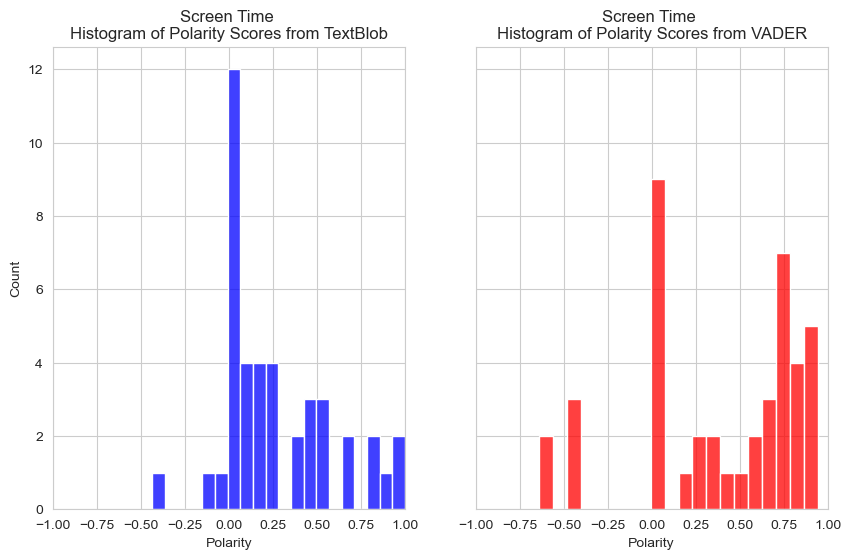

In [44]:
hist_graph_plot_blob_vs_vadar(app1tb_df, app1_vad_df, 'Screen Time')

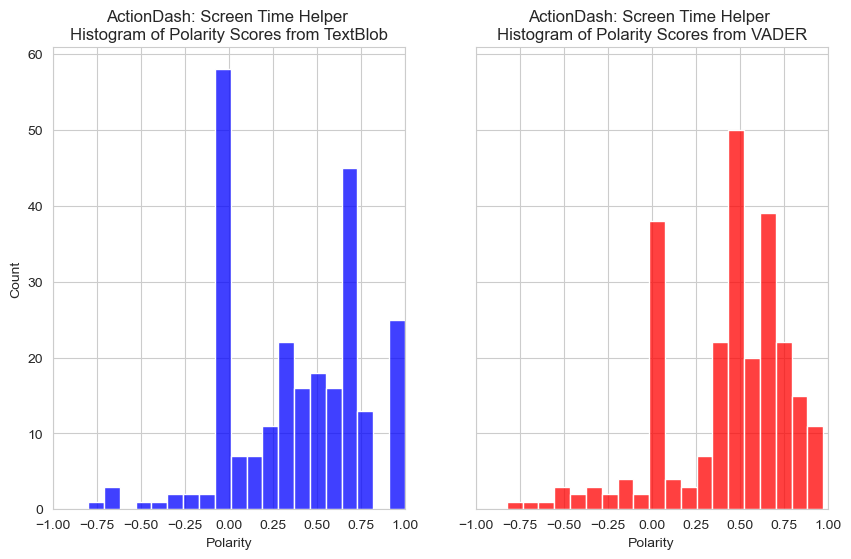

In [45]:
hist_graph_plot_blob_vs_vadar(app2tb_df, app2_vad_df, 'ActionDash: Screen Time Helper')

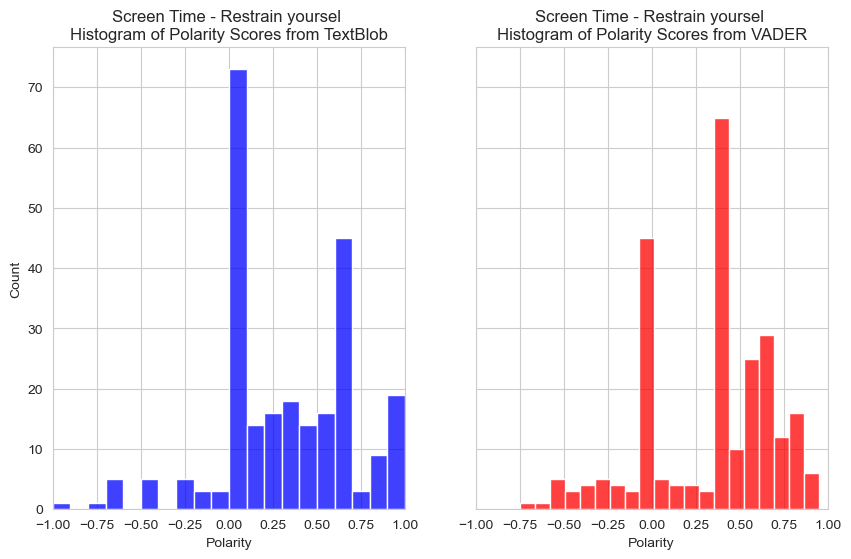

In [46]:
hist_graph_plot_blob_vs_vadar(app3tb_df, app3_vad_df, 'Screen Time - Restrain yoursel')

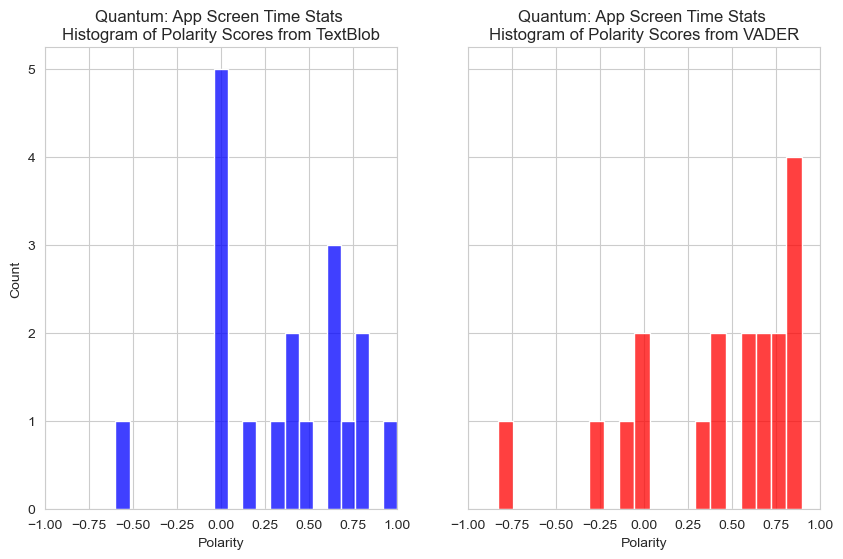

In [47]:
hist_graph_plot_blob_vs_vadar(app4tb_df, app4_vad_df, 'Quantum: App Screen Time Stats')

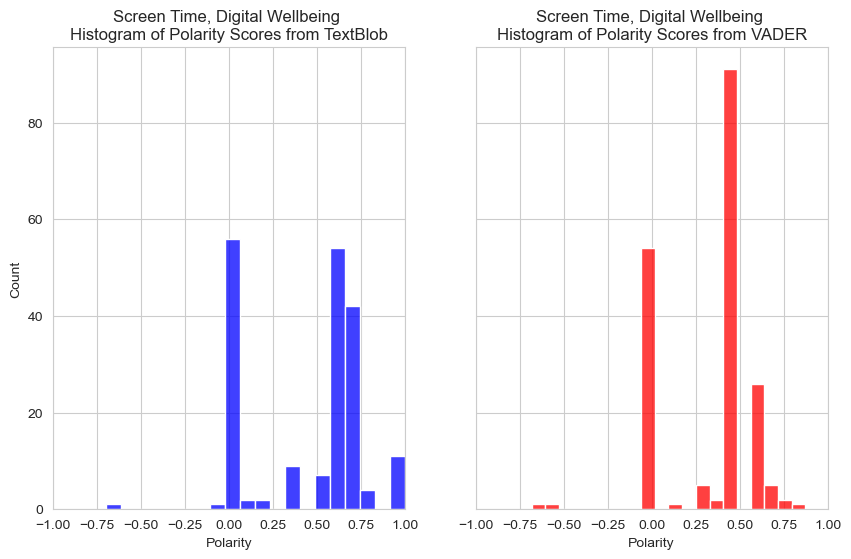

In [48]:
hist_graph_plot_blob_vs_vadar(app5tb_df, app5_vad_df, 'Screen Time, Digital Wellbeing')

### 1. How does the sentiment retrieved by TextBlob and VADER compare with each other?

When looking at the data for both libraries, we can say that both interpret the majority of reviews as being positive or having a polarity close to 1. However, when compared, we see that TextBlob has a higher concentration of reviews around the center or having a polarity of 0 compared to what is seen in the VADER histograms. To further support this trend, we can see that for every application, TextBlob determines a higher number of reviews as objective, specifically having a polarity of 0.

### 2. How do you interpret the similarity/difference?

What can be interpreted as similar is the fact that generally speaking, both libraries seem to interpret reviews as being positive and hardly interpret any reviews as being negative. Where they differ lies in the fact that TextBlob seems to interpret more reviews as being objective or neutral.

### 3. Which one is the best option for review analysis of your apps? Why?

As it pertains to my apps, I believe that TextBlob is the best option for review analysis because its distribution of sentiment for the reviews is more balanced, suggesting a wider range of objective reviews from which a larger amount of more clear and defined requirements for the system can be extracted.

# TASK 4: TOPIC MODELING Using LDA

In [49]:
import gensim
from gensim import corpora

In [50]:
def top_mod_via_LDA(df_to_undergo_TPMLDA):
    # Tokenize words 
    tokenized_docs = [doc.split() for doc in df_to_undergo_TPMLDA["Final Preprocessed Reviews"]]

    # Create a dictionary
    dictionary_LDA = corpora.Dictionary(tokenized_docs)

    # Create a bag of words
    bow_corpus = [dictionary_LDA.doc2bow(text) for text in tokenized_docs]

    # Train an LDA model
    num_topics_LDA = 10
    lda_model_LDA = gensim.models.ldamodel.LdaModel(corpus=bow_corpus, num_topics=num_topics_LDA, id2word=dictionary_LDA)

    # Extract clusters of words
    lda_topics = lda_model_LDA.show_topics(num_topics=num_topics_LDA, num_words=7, formatted=False)

    # Fill the DataFrame with clusters
    df_cont_topics = pd.DataFrame([(i+1, ", ".join([word[0] for word in topic[1]])) for i, topic in enumerate(lda_topics)], 
                            columns=["Topic", "Cluster of Words"]).set_index("Topic")

    return df_cont_topics

In [51]:
tp_df_app2 = top_mod_via_LDA(app2a_df)
print('Cluster of Words Generated by TPModeling via LDA after running function \n(Not Saved Output)')
tp_df_app2

Cluster of Words Generated by TPModeling via LDA after running function 
(Not Saved Output)


,Cluster of Words
Topic,
1,"great, app, time, like, focus, work, feature"
2,"app, time, love, phone, much, useful, use"
3,"app, use, time, great, help, work, screen"
4,"usage, app, doesnt, everything, limit, recomme..."
5,"app, useful, excellent, amaze, minute, five, time"
6,"app, time, apps, helpful, focus, really, phone"
7,"nice, app, good, awesome, work, really, apps"
8,"app, best, good, use, time, one, limit"
9,"good, app, bad, super, application, phone, really"


In [52]:
tp_df_app2.loc[1, 'Topic'] = 'Time management'
tp_df_app2.loc[2, 'Topic'] = 'Block apps that are really/highly being used'
tp_df_app2.loc[3, 'Topic'] = 'Wiget form for App'
tp_df_app2.loc[4, 'Topic'] = 'Productivity/Work Time Tracker'
tp_df_app2.loc[5, 'Topic'] = 'Mobile Application'
tp_df_app2.loc[6, 'Topic'] = 'Screen Time Usage'
tp_df_app2.loc[7, 'Topic'] = 'Control which applications can be used for durations of time'
tp_df_app2.loc[8, 'Topic'] = 'Set a time limit for which the screen can be used'
tp_df_app2.loc[9, 'Topic'] = 'Time tracker'
tp_df_app2.loc[10, 'Topic'] = 'Focus mode'

topics = ['Time management', 
          'Block apps that are really/highly being used', 
          'Widget form for App', 
          'Productivity/Work Time Tracker', 
          'Mobile Application', 
          'Screen Time Usage',
          'Control which applications can be used for durations of time', 
          'Set a time limit for which the screen can be used',
          'Time tracker', 
          'Focus mode']

clusters = [['app', 'nice', 'great', 'best', 'good', 'helpful', 'phone'], 
            ['app', 'use', 'apps', 'block', 'mode', 'really', 'best'], 
            ['app', 'awesome', 'time', 'work', 'apps', 'perfect', 'widget'], 
            ['app', 'good', 'well', 'one', 'work', 'make', 'feature'], 
            ['excellent', 'app', 'great', 'really', 'recommend', 'time', 'useful'], 
            ['time', 'much', 'phone', 'use', 'spend', 'app', 'helpful'], 
            ['useful', 'app', 'amaze', 'nice', 'really', 'control', 'application'], 
            ['app', 'time', 'usage', 'phone', 'limit', 'screen', 'help'],
            ['good', 'app', 'time', 'love', 'usage', 'use', 'apps'], 
            ['app', 'time', 'use', 'help', 'one', 'focus', 'mode']]
print('Cluster of Words Generated by TPModeling via LDA mapped to appropriate Topics \n(Saved Output)')
Saved_topics_and_clusters = pd.DataFrame({'Topic': topics, 'Cluster of Words': clusters})
Saved_topics_and_clusters

Cluster of Words Generated by TPModeling via LDA mapped to appropriate Topics 
(Saved Output)


,Topic,Cluster of Words
0,Time management,"[app, nice, great, best, good, helpful, phone]"
1,Block apps that are really/highly being used,"[app, use, apps, block, mode, really, best]"
2,Widget form for App,"[app, awesome, time, work, apps, perfect, widget]"
3,Productivity/Work Time Tracker,"[app, good, well, one, work, make, feature]"
4,Mobile Application,"[excellent, app, great, really, recommend, tim..."
5,Screen Time Usage,"[time, much, phone, use, spend, app, helpful]"
6,Control which applications can be used for dur...,"[useful, app, amaze, nice, really, control, ap..."
7,Set a time limit for which the screen can be used,"[app, time, usage, phone, limit, screen, help]"
8,Time tracker,"[good, app, time, love, usage, use, apps]"
9,Focus mode,"[app, time, use, help, one, focus, mode]"


### 1. How do these review topics (i.e. summarized user feedback) compare to the software feature clusters you extracted in Assignment 1?

They are similar in the sense that some topics describe the clusters that were defined in Assignment 1. For example, the "Widget form for App" topic essentially describes the Permanent Notification cluster (Cluster for Requirement 1), alongside the Screen Time Usage topic, which is relevant to this cluster because the cluster describes displaying a screen time usage stat. Other topics, such as Time Tracker and Mobile Application, are both topics that the collection of clusters describe as the goals for the system. Together, these clusters describe functionalities for a system that would categorically be described as an "application developed for mobile" that tracks time and/or a stat of time. However, where they differ is in the remaining topics that cannot be related to the clusters, which describe features that the requirement clusters from Assignment 1 do not consider. This difference stems from the fact that the topics are based on ActionDash, a similar but obviously separate app with more functionality than ScreenTime, which the clusters account for.

### 2. How do you explain the differences in terms of accuracy of the model and the size of data?

For a large dataset, similar to the ActionDash dataframe that underwent the Topic Modeling technique via the Gensim-LDA library/tool, the larger the dataset, the less accurate the derived model is likely to be. This is because a large dataset is more likely to contain different clusters of words that have more of the same repeating words. As a result, these clusters are less exclusive than they should be and not as exhaustive in that they do not completely represent the entire dataset. This lack of mutual exclusivity and exhaustiveness between these clusters carries over to the topics, which should be more unique and specific, as opposed to how they are more overlapping than they should be now. In other words, an increase in the size of the dataset implies a decrease in the accuracy of the model and vice versa.

### 3. Does any of the topics relate to the core functionalities you identified? Why?

Topic 1, which is specified as "Widget form for App," and Topic 2, "Screen Time Usage," relate very closely to the Permanent Notification cluster defined in Assignment 1 (Cluster for Requirement 1), which is one of two clusters defined as the core functionality for the application. Topic 1 is related to the permanent notification functionality in that a widget for the app is a permanently attached UI service in the same sense that a permanent notification is. Continuing on, this cluster describes displaying a screen time usage stat, which is essentially what Topic 2, "Screen Time Usage," covers.

# TASK 5: Recommendation

### 1. Recommend two new features or enhancements (could be bug reports) for the app based on your above analysis that have not been done in the project. 

The main app of discussion is the Screen Time application. After looking at all the data above and task 4, which examines the different topics indicating features available on the similar ActionDash application, I can suggest many possible features to enhance Screen Time. Ultimately, I recommend two features: an online peer-to-peer time usage stats comparison and an activity mode screen time tracker.

The online peer-to-peer time usage stats comparison feature would allow users to see how they rank amongst other users of the app in terms of the time they spend on their phone. This would be a good indication of whether they are spending large amounts of time on their device.

Regarding the activity mode screen time tracker, users would be able to set a duration of time for which they will devote themselves to completing an activity. During this duration of time, every time the user uses their device, that time of screen usage will be accounted for. This feature allows users to see just how much of their time goes into completing a task in comparison to the amount of time they may be distracted on their device.

Ultimately, I believe that these features would enhance the Screen Time app by providing users with a set of reasons or goals for tracking their time, as opposed to the current functionality of Screen Time, which only allows users to track time for the sake of doing so.

### 2. How do you compare these recommendations, with the recommendations you provided based on persona analysis in Assignment 2? Explain similarities and differences. 

Recommendations I have submitted for question 2 cannot be compared to any provided in assignment 2 in terms of similarity and differences, as recommendations for assignment 2 do not exist.